# init

In [43]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt



In [20]:
import sys
sys.path.append('../../../')
sys.path.append('../../infras/cellMix/')
sys.path.append('../../infras/cytof_data/')
sys.path.append('../../infras/')
sys.path.append('../../infras/dashboards/')
sys.path.append('../../experiments/')
sys.path.append('../../experiments/pipeline/')
sys.path.append('../../preprocess/intra_variance/')
sys.path.append('../../models/cell_proportions/')
sys.path.append('../../measures/cell_proportions_measures/')
sys.path.append('../../preprocess/cell_specifics/')

from global_utils import GlobalUtils
from cell_proportions_measure import CellProportionsMeasure


# read and build results

## read

In [10]:
dir_path = r"C:\Repos\deconv_py\deconv_py\experiments\archive"
#read all measurements from dir

known_dict = {}
deconv_dict = {}
i=0
for root, dirs, files in os.walk(dir_path):
     for file in files:
            _df = None
            if "known" in file : 
                _id = file.split("-")[1].split(".pkl")[0]
                _df = pd.read_pickle(os.path.join(root, file))
                known_dict[_id] = _df
            if "result" in file : 
                _id = file.split("-")[1].split(".pkl")[0]
                _df = pd.read_pickle(os.path.join(root, file))
                deconv_dict[_id] = _df
            

## build

In [18]:
def return_measures(known_results,deconv_result):
    if not any([(col in known_results.index.tolist()) for col in deconv_result.index]) :
        columns_mapping = GlobalUtils.get_corospanding_cell_map_from_lists(known_results.index.to_list(),
                                                                               deconv_result.index.to_list())
        known_results = known_results.rename(index=columns_mapping)

    mixtures_map = GlobalUtils.get_corospanding_mixtures_map_from_lists(deconv_result.columns,known_results.columns)
    deconv_result = deconv_result.rename(columns=mixtures_map)


    measure_function = lambda x,y : x.corrwith(y,method="spearman", axis=0)
    return measure_function(deconv_result,known_results)


In [48]:
known_res_df

mixtures,HR-38-V1,HR-42-V1,HR-42-V2,HR-42-V3,HR-44-V1,HR-44-V2,HR-44-V3,HR-46-V1,HR-46-V2,HR-46-V3,...,HR-26-V3,HR-27-V1,HR-27-V2,HR-27-V3,HR-40-V1,HR-28-V1,HR-28-V2,HR-28-V3,HR-40-V2,HR-40-V3
B cells,0.057489,0.040476,0.068597,0.084654,0.073821,0.144858,0.174432,0.033409,0.043453,0.046067,...,0.097486,0.092812,0.099856,0.109796,0.088828,0.047591,0.048947,0.045633,0.074620,0.084488
CD4+ effector memory T cells,0.266510,0.217216,0.250956,0.208409,0.216151,0.262363,0.251696,0.180067,0.175565,0.247014,...,0.300145,0.160630,0.144937,0.185077,0.187741,0.182639,0.193912,0.195710,0.252330,0.274337
CD8+ effector memory T cells,0.128690,0.107624,0.141773,0.114293,0.141567,0.160678,0.143981,0.066595,0.066737,0.064278,...,0.127119,0.054017,0.048008,0.049102,0.128187,0.146647,0.149816,0.170563,0.164474,0.135030
Monocytes,0.301346,0.138541,0.110739,0.171603,0.391372,0.282385,0.268240,0.264566,0.271233,0.245375,...,0.137565,0.261097,0.375084,0.332580,0.118064,0.091841,0.102161,0.130329,0.087644,0.141700
NK,0.091036,0.089765,0.075324,0.078401,0.089429,0.069905,0.059874,0.104867,0.170540,0.086347,...,0.146562,0.045168,0.046920,0.046873,0.045006,0.054737,0.060862,0.075125,0.097230,0.101105
Na?ve CD4 Tcell,0.092636,0.269536,0.231372,0.222518,0.057440,0.053270,0.070463,0.230660,0.177205,0.206940,...,0.137579,0.288839,0.205459,0.209614,0.268451,0.282396,0.270359,0.227385,0.201156,0.168222
Na?ve CD8 Tcell,0.049589,0.121553,0.109268,0.108624,0.003965,0.014557,0.018984,0.101638,0.076072,0.083881,...,0.032964,0.083660,0.068113,0.053958,0.151635,0.181297,0.159883,0.137028,0.110636,0.081667
Plasmacytoid dendritic cells,0.012706,0.015289,0.011971,0.011498,0.026254,0.011985,0.012330,0.018198,0.019195,0.020097,...,0.020580,0.013777,0.011623,0.013000,0.012089,0.012853,0.014060,0.018228,0.011911,0.013452


In [32]:
cpm = CellProportionsMeasure()

all_result_list = []
for exp_id in known_dict.keys() : 
    known_res_df = known_dict[exp_id]
    deconv_res_df = deconv_dict[exp_id]
    res = return_measures(known_res_df,deconv_res_df)
    res = res.rename(exp_id)
    all_result_list.append( res)


In [34]:
all_results_df = pd.concat(all_result_list,axis=1)
all_results_df

,100267684,100756376,101235102,101823526,102282320,102751046,103229766,103668592,10407890,104157292,...,95849496,96697236,97146028,97724486,98253064,98791626,993076,99340166,9979032,99828858
HR-24-V1,0.121988,0.342914,0.061379,0.342914,0.121988,0.342914,0.096393,-0.309524,0.412393,0.035929,...,0.191620,0.412393,0.121988,0.342914,0.061379,0.342914,0.405262,0.121988,0.214286,0.342914
HR-24-V2,0.412393,0.412393,0.412393,0.412393,0.412393,0.412393,-0.491027,-0.142857,0.412393,-0.491027,...,0.132540,0.412393,0.412393,0.412393,0.412393,0.412393,0.405262,0.412393,0.214286,0.412393
HR-24-V3,0.412393,0.412393,0.412393,0.412393,0.412393,0.412393,-0.785714,-0.238095,0.187044,-0.785714,...,-0.073193,0.187044,0.412393,0.412393,0.412393,0.412393,0.218218,0.412393,0.184136,0.412393
HR-26-V1,-0.431244,-0.233805,-0.431244,-0.233805,-0.431244,-0.233805,-0.219578,-0.238095,-0.082479,-0.337374,...,-0.469914,-0.082479,-0.431244,-0.233805,-0.431244,-0.233805,-0.082479,-0.431244,-0.500000,-0.233805
HR-26-V2,0.135033,-0.264979,-0.120491,-0.264979,0.121988,-0.264979,-0.047905,-0.380952,-0.264979,-0.179644,...,-0.397619,-0.264979,0.135033,-0.264979,-0.120491,-0.264979,-0.054554,0.121988,-0.233239,-0.264979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HR-40-V3,0.000000,-0.046761,-0.095238,-0.046761,0.023953,-0.046761,-0.095238,-0.190476,0.046761,-0.095238,...,0.024551,0.046761,0.000000,-0.046761,-0.095238,-0.046761,-0.025367,0.023953,0.319169,-0.046761
HR-42-V1,-0.196411,-0.187044,-0.323359,-0.187044,-0.215622,-0.187044,-0.263478,0.119048,0.247436,-0.263478,...,0.156638,0.247436,-0.196411,-0.187044,-0.323359,-0.187044,-0.190941,-0.215622,0.214286,-0.187044
HR-42-V2,-0.119763,-0.202631,-0.060616,-0.202631,0.073193,-0.202631,0.227549,-0.166667,0.082479,0.119048,...,-0.036147,0.082479,-0.119763,-0.202631,-0.060616,-0.202631,-0.327327,0.073193,0.108442,-0.202631
HR-42-V3,-0.076102,-0.046761,-0.076102,-0.046761,-0.076102,-0.046761,-0.107786,-0.119048,0.046761,-0.215573,...,0.397619,0.046761,-0.076102,-0.046761,-0.076102,-0.046761,-0.163663,-0.076102,0.323359,-0.046761


-------------
-------------
-------------


B cells                         0.069958
CD4+ effector memory T cells    0.281112
CD8+ effector memory T cells    0.132206
Monocytes                       0.096695
NK                              0.218759
Na?ve CD4 Tcell                 0.154482
Na?ve CD8 Tcell                 0.032440
Plasmacytoid dendritic cells    0.014348
Name: HR-26-V1, dtype: float64

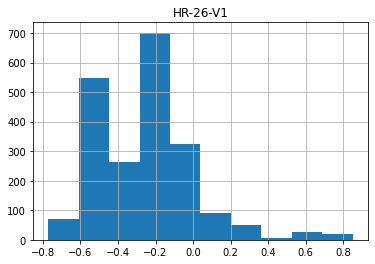

-------------


B cells                         0.106614
CD4+ effector memory T cells    0.294104
CD8+ effector memory T cells    0.144529
Monocytes                       0.096417
NK                              0.159694
Na?ve CD4 Tcell                 0.152208
Na?ve CD8 Tcell                 0.031356
Plasmacytoid dendritic cells    0.015079
Name: HR-26-V2, dtype: float64

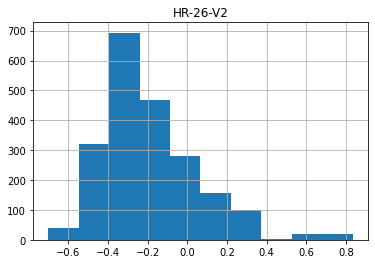

-------------
-------------
-------------
-------------
-------------


B cells                         0.047591
CD4+ effector memory T cells    0.182639
CD8+ effector memory T cells    0.146647
Monocytes                       0.091841
NK                              0.054737
Na?ve CD4 Tcell                 0.282396
Na?ve CD8 Tcell                 0.181297
Plasmacytoid dendritic cells    0.012853
Name: HR-28-V1, dtype: float64

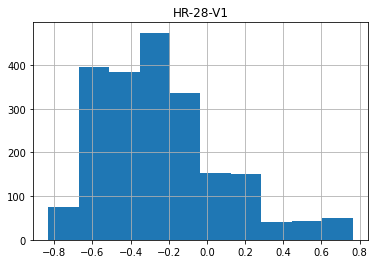

-------------


B cells                         0.048947
CD4+ effector memory T cells    0.193912
CD8+ effector memory T cells    0.149816
Monocytes                       0.102161
NK                              0.060862
Na?ve CD4 Tcell                 0.270359
Na?ve CD8 Tcell                 0.159883
Plasmacytoid dendritic cells    0.014060
Name: HR-28-V2, dtype: float64

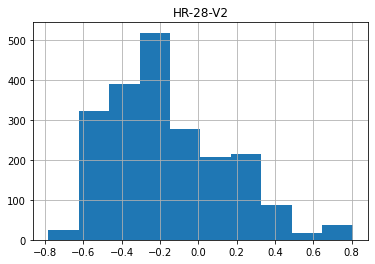

-------------


B cells                         0.045633
CD4+ effector memory T cells    0.195710
CD8+ effector memory T cells    0.170563
Monocytes                       0.130329
NK                              0.075125
Na?ve CD4 Tcell                 0.227385
Na?ve CD8 Tcell                 0.137028
Plasmacytoid dendritic cells    0.018228
Name: HR-28-V3, dtype: float64

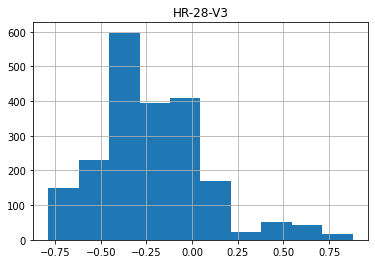

-------------
-------------
-------------


B cells                         0.068496
CD4+ effector memory T cells    0.229231
CD8+ effector memory T cells    0.107370
Monocytes                       0.146565
NK                              0.055043
Na?ve CD4 Tcell                 0.234268
Na?ve CD8 Tcell                 0.147376
Plasmacytoid dendritic cells    0.011651
Name: HR-29-V3, dtype: float64

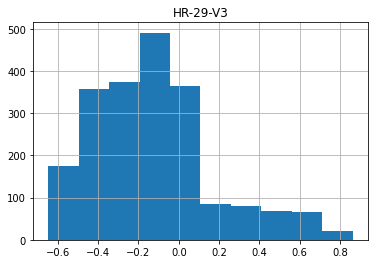

-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------


B cells                         0.046067
CD4+ effector memory T cells    0.247014
CD8+ effector memory T cells    0.064278
Monocytes                       0.245375
NK                              0.086347
Na?ve CD4 Tcell                 0.206940
Na?ve CD8 Tcell                 0.083881
Plasmacytoid dendritic cells    0.020097
Name: HR-46-V3, dtype: float64

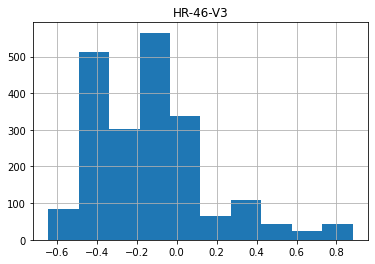

-------------
-------------


B cells                         0.127567
CD4+ effector memory T cells    0.269652
CD8+ effector memory T cells    0.143040
Monocytes                       0.072093
NK                              0.019826
Na?ve CD4 Tcell                 0.183356
Na?ve CD8 Tcell                 0.178009
Plasmacytoid dendritic cells    0.006457
Name: HR-47-V2, dtype: float64

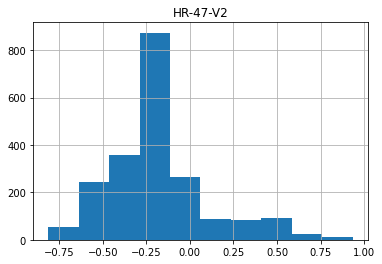

-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------
-------------


B cells                         0.088828
CD4+ effector memory T cells    0.187741
CD8+ effector memory T cells    0.128187
Monocytes                       0.118064
NK                              0.045006
Na?ve CD4 Tcell                 0.268451
Na?ve CD8 Tcell                 0.151635
Plasmacytoid dendritic cells    0.012089
Name: HR-40-V1, dtype: float64

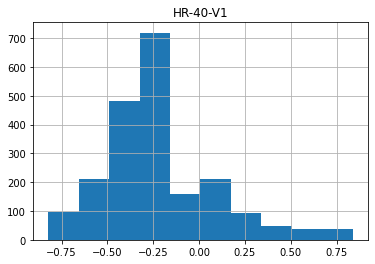

-------------
-------------


B cells                         0.040476
CD4+ effector memory T cells    0.217216
CD8+ effector memory T cells    0.107624
Monocytes                       0.138541
NK                              0.089765
Na?ve CD4 Tcell                 0.269536
Na?ve CD8 Tcell                 0.121553
Plasmacytoid dendritic cells    0.015289
Name: HR-42-V1, dtype: float64

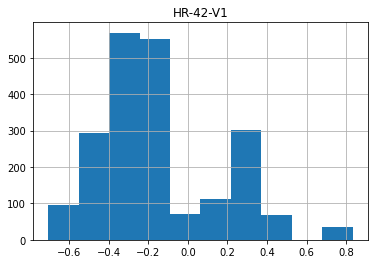

-------------
-------------
-------------
-------------


In [51]:
for mix in all_results_df.index : 
    mix_res = all_results_df.loc[mix]
    if mix_res.quantile(0.7) < 0 : 
        display(known_res_df[mix])
        mix_res.hist()
        plt.title(mix)
        plt.show()
    print("-------------")
